In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import util
import vae3d

import sys
import os

import scipy.ndimage as nd
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure as sk

from mpl_toolkits import mplot3d

# Data loading

We have a bunch of chair images in 32x32x32x1 voxels.

In [4]:
X = util.getAll("chair")
X = np.expand_dims(X.astype(float), 4)

In [5]:
bf = util.BatchFeeder(X, 32)

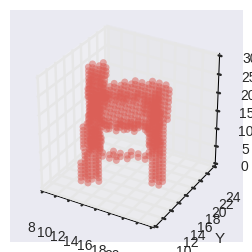

In [7]:
util.plotVoxel(bf.next()[0], size=(3,3))

# 3D VAE 

Some of the things it does.
- Takes the volumetric images.
- Applies 3d convolution to boil it down to 200D latent vectors
- Applies 3d transposed convolution to reconstruct the original image.
- Evidence Lower bound is minimized by minimizing KL and reconstruction error.

In [8]:
model = vae3d.VAE3D(latent_dim=50)

In [ ]:
model.train(bf, 50)

Epoch:1 train_cost: 19437.3 ( 34.4301 19402.9 )
Epoch:2 train_cost: 14603.4 ( 73.0882 14530.3 )
Epoch:3 train_cost: 11132.3 ( 92.7821 11039.5 )


# Learning curve

In [ ]:
kld = []
rec = []
for e in range(len(model.learning_curve)):
    kld.append(np.mean(model.learning_curve[e]["kld"]))
    rec.append(np.mean(model.learning_curve[e]["rec"]))

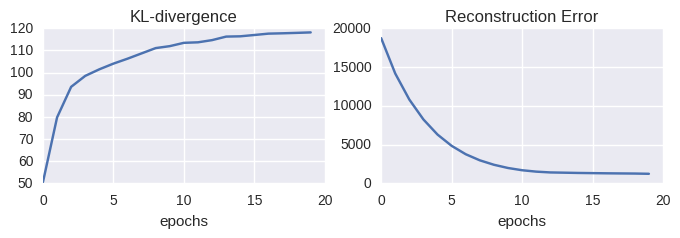

In [14]:
plt.figure(figsize=(8,2))

plt.subplot(1,2,1)
plt.plot(kld)
plt.title("KL-divergence")
plt.xlabel("epochs")
#plt.yscale("log")

plt.subplot(1,2,2)
plt.plot(rec)
plt.title("Reconstruction Error")
plt.xlabel("epochs")
#plt.yscale("log")

plt.show()

# Visualizing the reconstructed chairs

In [ ]:
x = model.record["reconstructed"][-2]
z = model.record["z"][-2]

In [ ]:
gan3d.plotVoxel(x, size=(4,4))

# Perturbing the latent space

In [74]:
def getplotable(d, th = 0.5, size=(6,6)):
    temp = []
    bina = d > th
    for i in range(d.shape[0]):
        for j in range(d.shape[1]):
            for k in range(d.shape[2]):
                if bina[i, j, k]:
                    temp.append([i, j, k])
    temp = np.array(temp)
    return temp

3719 1985


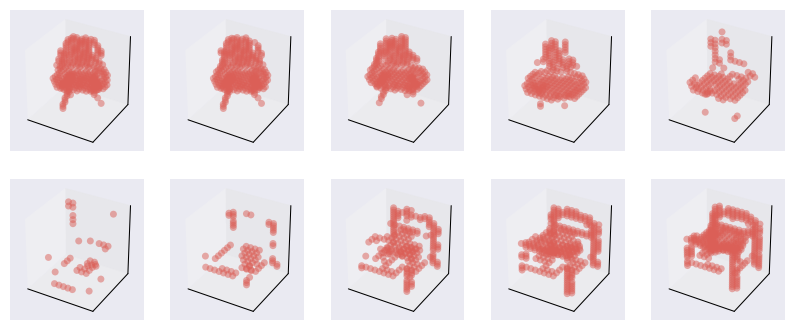

In [87]:
index1 = np.random.randint(10000)
x1 = model.record["reconstructed"][index1]
z1 = model.record["z"][index1]

index2 = np.random.randint(10000)
x2 = model.record["reconstructed"][index2]
z2 = model.record["z"][index2]

print index1, index2

vecs = util.interp(z1, z2, 9)

fig = plt.figure(figsize=(10,4))
for i in range(len(vecs)):
    vec = vecs[i]
    _in = np.zeros((32,200))
    _in[0, :] = vec
    _out = model.decode(_in)
    
    temp = getplotable(_out[0])
    
    ax = plt.subplot(2,5,i+1, projection='3d')

    n = 100
    colors = sns.color_palette("hls", 5)
    ax.scatter(temp[:,0], temp[:,1], temp[:,2], c=colors[0], marker=".", alpha=0.5, linewidth=0, s=100)
   
    ax.set_xticks([], [])
    ax.set_yticks([], [])
    ax.set_zticks([], [])
plt.savefig("figure/vae3d/"+str(index1)+"_"+str(index2)+".png")
plt.show()